# 10  Exploratory data analysis
## 10.3 Variation

We’ll start our exploration by visualizing the distribution of weights (carat) of ~54,000 diamonds from the diamonds dataset. Since carat is a numerical variable, we can use a histogram:

In [1]:
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

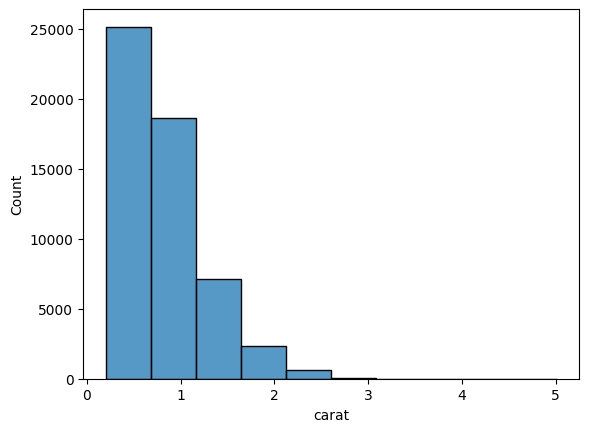

In [2]:
# Load the diamonds dataset from seaborn
diamonds = load_dataset('diamonds')

# Plot a histogram with bin width 0.5
sns.histplot(data=diamonds, x='carat', binwidth=0.5)

# Show the plot
plt.show()

Let’s take a look at the distribution of carat for smaller diamonds.

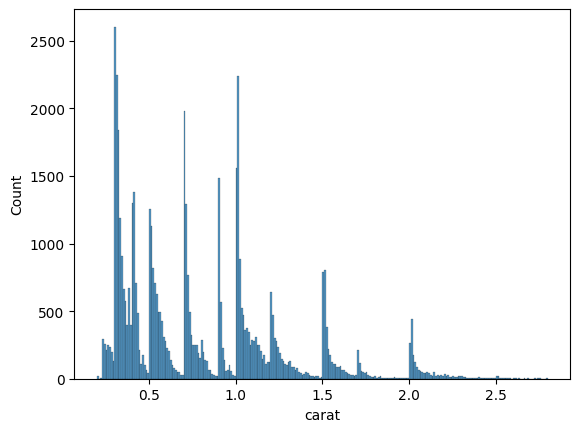

In [3]:
# Filter to include only rows where carat is less than 3
smaller = diamonds[diamonds['carat'] < 3]

# Create the histogram with bin width of 0.01
sns.histplot(data=smaller, x='carat', binwidth=0.01)

# Show the plot
plt.show()


10.3.2 Unusual values

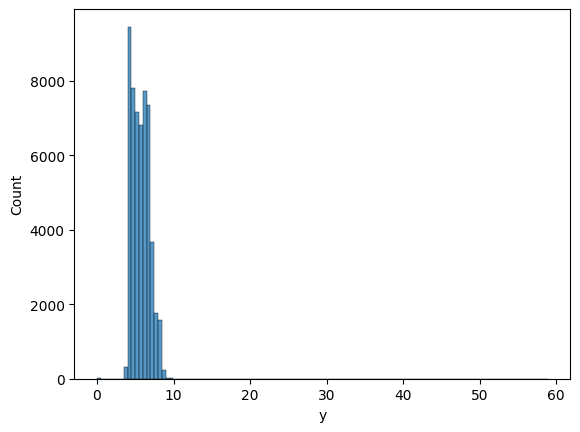

In [4]:
# Create the histogram of 'y' with bin width of 0.5
sns.histplot(data=diamonds, x='y', binwidth=0.5)

# Show the plot
plt.show()


Zoom to small values

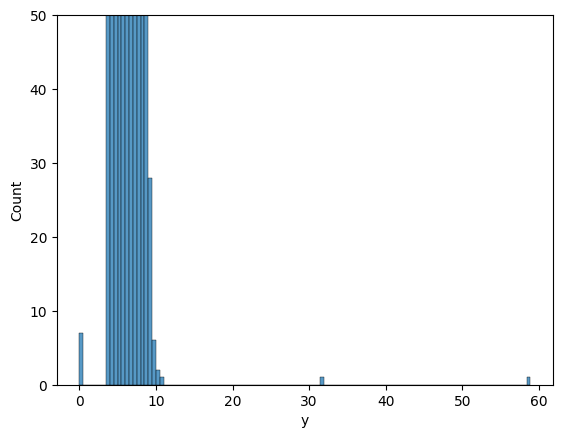

In [5]:
# Create the histogram of 'y' with bin width of 0.5
sns.histplot(data=diamonds, x='y', binwidth=0.5)

# Set the y-axis limit to 0 to 50
plt.ylim(0, 50)

# Show the plot
plt.show()


This allows us to see that there are three unusual values: 0, ~30, and ~60.

In [6]:
# Filter rows where 'y' is less than 3 or greater than 20, select specific columns, and sort by 'y'
unusual = (
    diamonds[(diamonds['y'] < 3) | (diamonds['y'] > 20)]
    .loc[:, ['price', 'x', 'y', 'z']]
    .sort_values(by='y')
)

# Display the result
print(unusual)


       price     x     y     z
11963   5139  0.00   0.0  0.00
15951   6381  0.00   0.0  0.00
24520  12800  0.00   0.0  0.00
26243  15686  0.00   0.0  0.00
27429  18034  0.00   0.0  0.00
49556   2130  0.00   0.0  0.00
49557   2130  0.00   0.0  0.00
49189   2075  5.15  31.8  5.12
24067  12210  8.09  58.9  8.06


10.3.3 Exercises

Explore the distribution of each of the x, y, and z variables in diamonds. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.

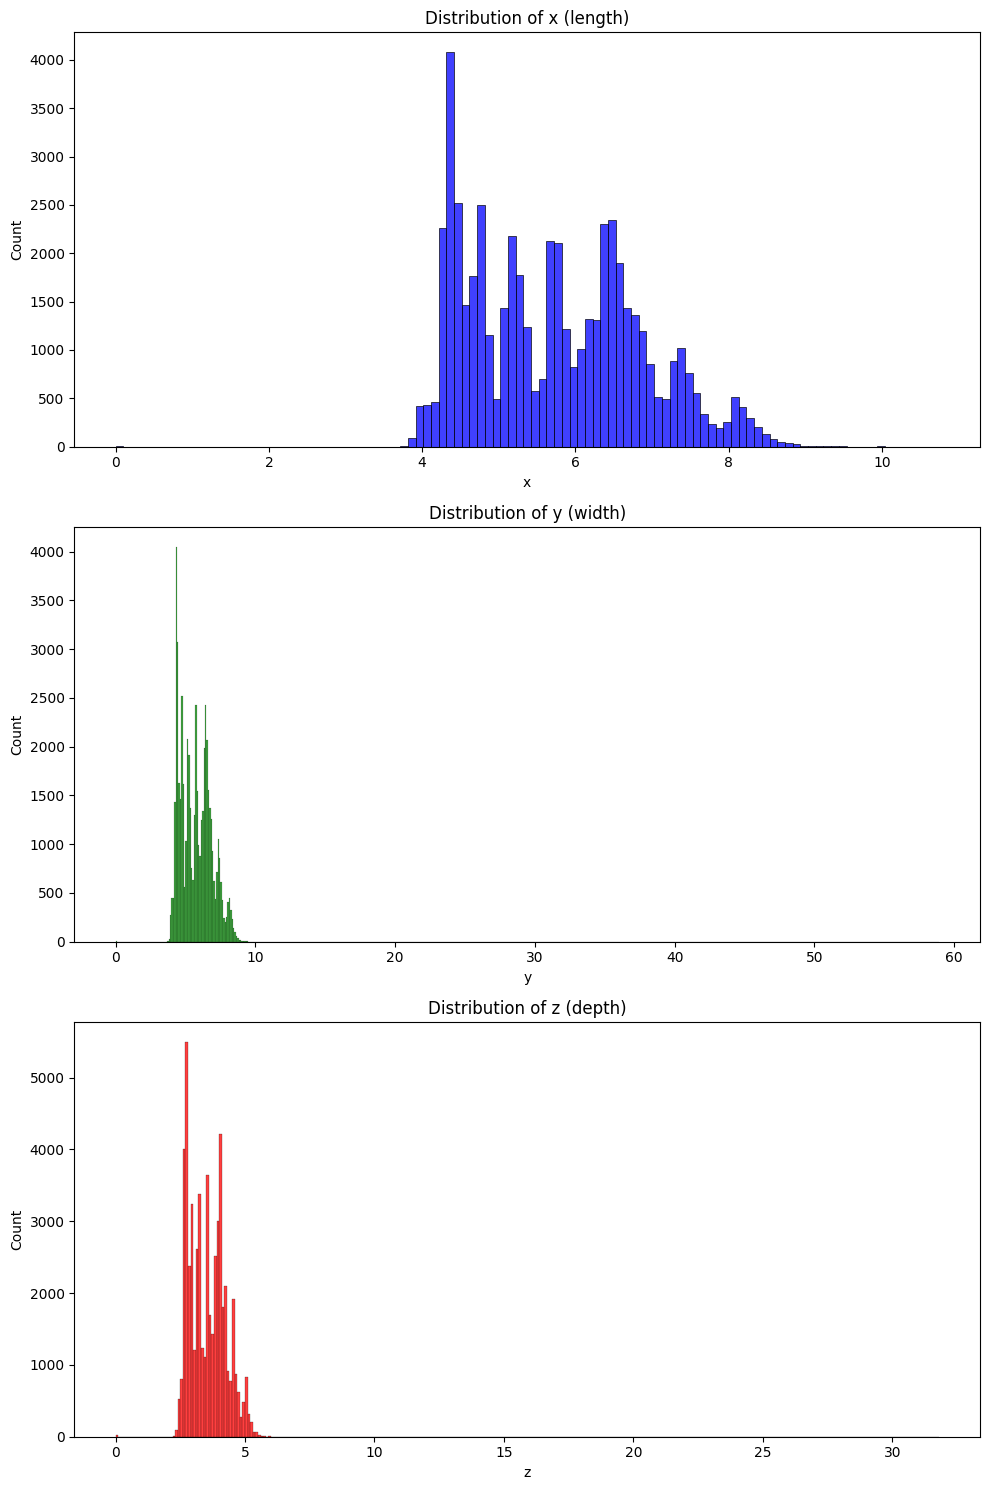

In [7]:
# Plot the distribution of x, y, and z variables using histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(data=diamonds, x='x', binwidth=0.1, ax=axes[0], color='blue')
axes[0].set_title('Distribution of x (length)')

sns.histplot(data=diamonds, x='y', binwidth=0.1, ax=axes[1], color='green')
axes[1].set_title('Distribution of y (width)')

sns.histplot(data=diamonds, x='z', binwidth=0.1, ax=axes[2], color='red')
axes[2].set_title('Distribution of z (depth)')

# Show the plots
plt.tight_layout()
plt.show()


## 📊 **Distributions of x, y, and z Variables**

The **x**, **y**, and **z** variables represent the physical dimensions of diamonds:

- **x**: Length
- **y**: Width
- **z**: Depth (or height)

### 🧩 **1. Distribution of x (Length)**

- The **x variable** has a **right-skewed distribution**, with most values between **4 mm and 8 mm**.
- There are **outliers** with unusually small or large values.
- The length dimension is usually larger than the width or depth.

### 🧩 **2. Distribution of y (Width)**

- The **y variable** follows a similar pattern to **x** but has more **outliers**.
- Most diamonds have a width between **4 mm and 8 mm**, but some extreme values exist (e.g., **0** or **over 30 mm**), which are likely **measurement errors** or **unusual diamonds**.

### 🧩 **3. Distribution of z (Depth/Height)**

- The **z variable** shows a **more compact distribution**, with most values between **2 mm and 6 mm**.
- The depth is generally **smaller than the length and width**, which makes sense since diamonds are typically flat.

---

## 🧠 **What Do We Learn from the Distributions?**

1. **Length (x) is typically the largest dimension**, followed by width (y), and then depth (z).
2. There are **some outliers** that may need further investigation (e.g., **zero values** for dimensions, which could be errors).
3. Diamonds are typically **wider and longer** than they are **deep**, which makes sense given their flat, cut shape.

Explore the distribution of price. Do you discover anything unusual or surprising? (Hint: Carefully think about the binwidth and make sure you try a wide range of values.)

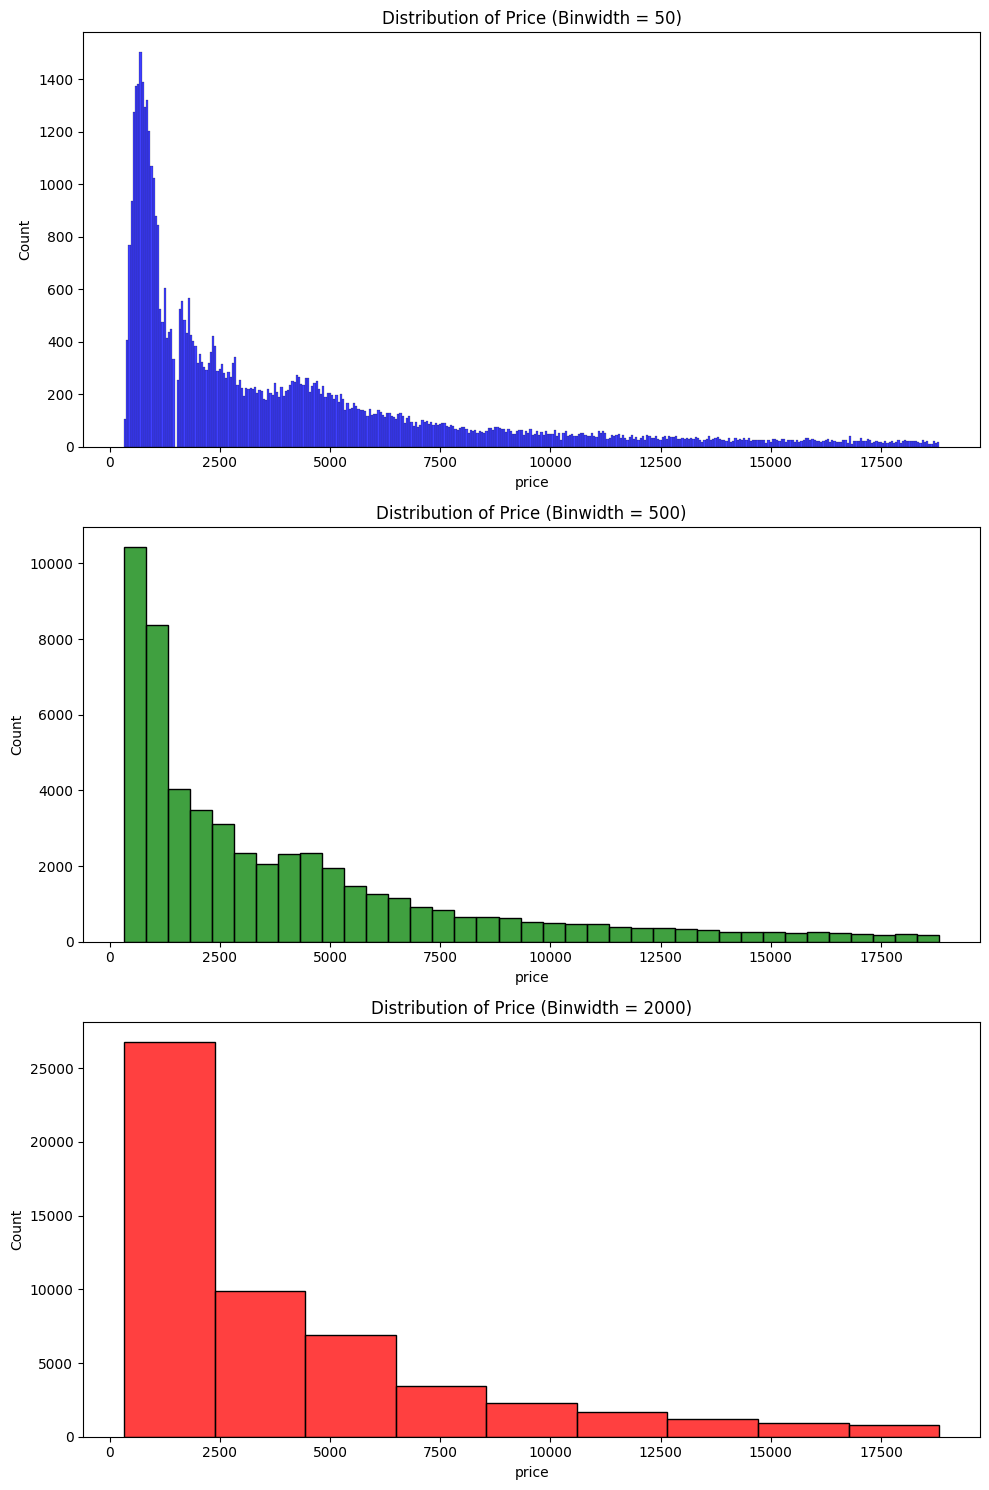

In [8]:
# Plot the distribution of the 'price' variable using different binwidths
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Small binwidth
sns.histplot(data=diamonds, x='price', binwidth=50, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Price (Binwidth = 50)')

# Medium binwidth
sns.histplot(data=diamonds, x='price', binwidth=500, ax=axes[1], color='green')
axes[1].set_title('Distribution of Price (Binwidth = 500)')

# Large binwidth
sns.histplot(data=diamonds, x='price', binwidth=2000, ax=axes[2], color='red')
axes[2].set_title('Distribution of Price (Binwidth = 2000)')

# Show the plots
plt.tight_layout()
plt.show()


### 🧩 **Observations Based on Bin Width**

#### 🔵 **1. Small Bin Width (e.g., 50):**

- The histogram shows a **detailed view of price variations**, but it looks quite **noisy**.
- There are **many small peaks** because of the fine granularity of bin widths.
- This might make it hard to see the overall pattern.

#### 🟢 **2. Medium Bin Width (e.g., 500):**

- The distribution appears **right-skewed** (most diamonds are priced lower, with fewer diamonds in higher price ranges).
- There are **spikes at specific prices**, likely corresponding to **round pricing values** (e.g., 1000, 2000 dollars), suggesting **pricing psychology** in diamond pricing.

#### 🔴 **3. Large Bin Width (e.g., 2000):**

- The distribution becomes **smoother** and easier to interpret.
- Most diamonds are priced **below $5000**, with a **long tail** of higher-priced diamonds.
- There are **very few diamonds** priced **above $15,000**, indicating that high-priced diamonds are rare.

---

### 🧩 **Unusual or Surprising Findings:**

1. **Right-Skewed Distribution**:  
   Most diamonds are **relatively inexpensive**, but there are a few that are **extremely expensive**, creating a **long tail** on the right.

2. **Price Clusters**:  
   There are **price spikes at round numbers** (e.g., **$1000, $2000, $5000**), likely because of **marketing strategies** or **consumer psychology**.

3. **Outliers**:  
   There are **some unusually expensive diamonds** priced over **$15,000**, which might need further investigation.


How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?

In [9]:
# Count the number of diamonds with 0.99 carat and 1.00 carat
count_099_carat = len(diamonds[diamonds['carat'] == 0.99])
count_100_carat = len(diamonds[diamonds['carat'] == 1.00])

# Display the counts
count_099_carat, count_100_carat


(23, 1558)

### 🧩 **Why is There a Difference?**

The difference is due to **consumer psychology** and **marketing practices** in the diamond industry:

1. **Rounding Effect**:  
   - Consumers prefer **whole numbers** like **1.00 carat** because it feels more valuable and prestigious.
   - Jewelers and marketers often highlight **1-carat diamonds** as a milestone size.

2. **Pricing Psychology**:  
   - **1.00-carat diamonds** are often sold at a **premium price** compared to slightly smaller diamonds, even if the size difference is barely noticeable.

3. **Supply and Demand**:  
   - There is more **demand** for **1-carat diamonds**, so jewelers may **cut diamonds** to meet that demand.

Compare and contrast coord_cartesian() vs. xlim() or ylim() when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

| **Function**       | **Description**                                        | **Effect on the Data**                                   | **Effect on Bins**                                     |
|--------------------|--------------------------------------------------------|---------------------------------------------------------|-------------------------------------------------------|
| `coord_cartesian()` | Zooms in on the plot **without modifying the underlying data**. | Keeps all bins the same size but adjusts the visible portion of the plot. | No bins are removed; only the visible area changes.   |
| `xlim()` / `ylim()` | **Filters the data** to only include values within the specified range. | Bins outside the specified range are completely removed from the plot. | This can cause incomplete or cut-off bars.            |

---

### 🔍 **Key Differences:**

1. **`coord_cartesian()`**:
   - **Does not remove any data points**; it simply changes the visible part of the plot.
   - It’s useful for **zooming in** without affecting the underlying distribution.

2. **`xlim()` / `ylim()`**:
   - **Removes data points** that fall outside the specified range.
   - This can **affect the shape of the histogram**, potentially removing whole bars or parts of bars.

---

### 🧩 **What Happens if `binwidth` is Unset?**

If **`binwidth` is unset**:
- **`geom_histogram()`** automatically calculates the bin width based on the data range and number of observations.
- The default bin width may not align well with the zoomed-in area, causing the histogram to look **misaligned** or **cluttered**.

---

### 🔧 **What Happens if You Zoom So Only Half a Bar Shows?**

If you zoom in so that **only half a bar shows**:

1. **With `coord_cartesian()`**:
   - The **half bar is still displayed**, even if part of it extends beyond the visible area.
   - The bar height is preserved because the underlying data hasn’t changed.

2. **With `xlim()` / `ylim()`**:
   - The **half bar may get cut off** or completely removed.
   - This is because `xlim()` / `ylim()` filters out the data points that would contribute to that bar.

---

### 📊 **Summary: When to Use Each**

| **Use Case**                   | **Best Function**     | **Why?**                                              |
|--------------------------------|-----------------------|------------------------------------------------------|
| Zooming in without affecting data | `coord_cartesian()`   | Keeps all data points and bins intact.               |
| Removing data outside a range   | `xlim()` / `ylim()`   | Filters data to focus on a specific range.           |
| Ensuring proper bin alignment   | Set `binwidth` manually | Prevents misaligned or cut-off bars in histograms.   |

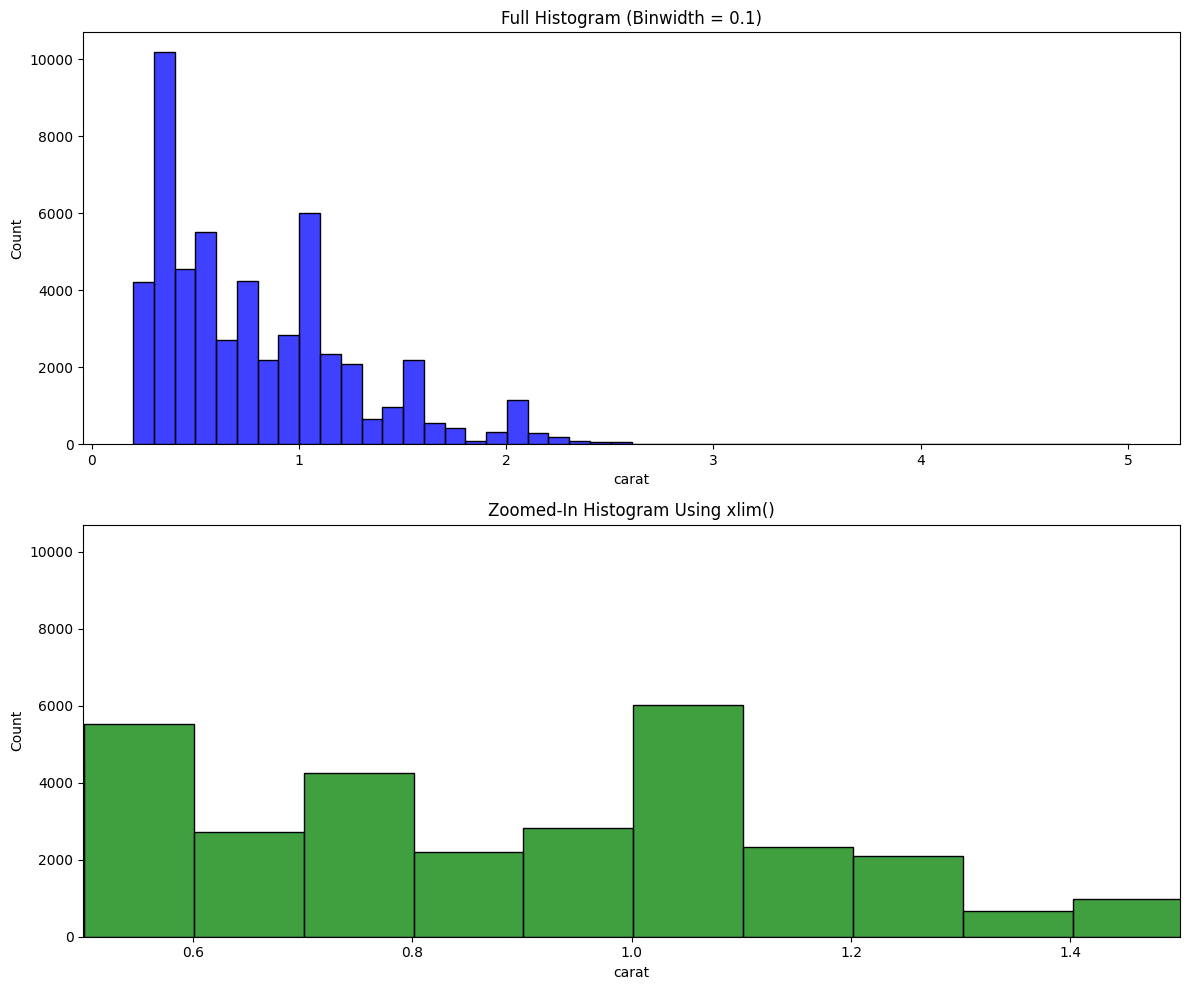

In [10]:
# Create a histogram with coord_cartesian() equivalent (zoom without removing data)
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# First plot: Full histogram 
sns.histplot(data=diamonds, x='carat', binwidth=0.1, ax=ax[0], color='blue')
ax[0].set_title('Full Histogram (Binwidth = 0.1)')

# Second plot: Using xlim to zoom (equivalent to xlim())
sns.histplot(data=diamonds, x='carat', binwidth=0.1, ax=ax[1], color='green')
ax[1].set_xlim(0.5, 1.5)  # Zooming in on a specific range
ax[1].set_title('Zoomed-In Histogram Using xlim()')

# Show the plots
plt.tight_layout()
plt.show()


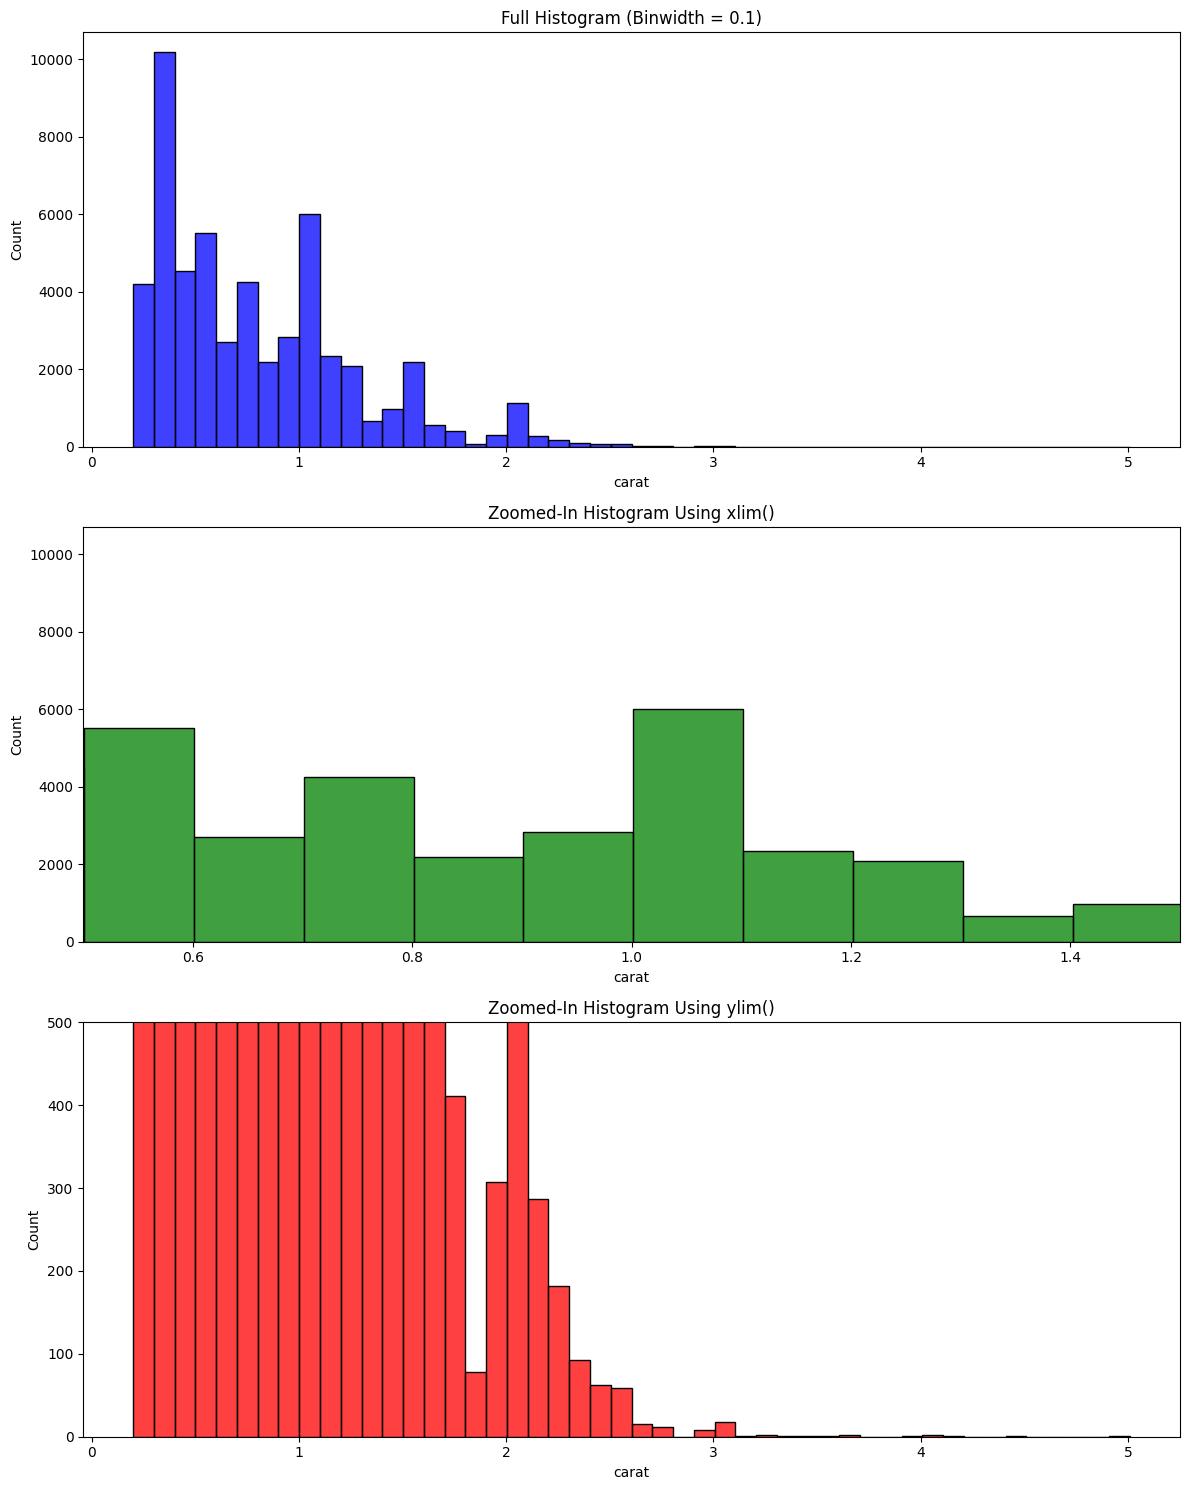

In [11]:
# Create a figure with 3 subplots: full histogram, zoomed using xlim(), and normal histogram
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# First plot: Normal histogram with binwidth 0.1
sns.histplot(data=diamonds, x='carat', binwidth=0.1, ax=ax[0], color='blue')
ax[0].set_title('Full Histogram (Binwidth = 0.1)')

# Second plot: Zoomed-In Histogram Using xlim()
sns.histplot(data=diamonds, x='carat', binwidth=0.1, ax=ax[1], color='green')
ax[1].set_xlim(0.5, 1.5)
ax[1].set_title('Zoomed-In Histogram Using xlim()')

# Third plot: Zoomed-In Histogram Using coord_cartesian() Equivalent ylim()
sns.histplot(data=diamonds, x='carat', binwidth=0.1, ax=ax[2], color='red')
ax[2].set_title('Zoomed-In Histogram Using ylim()')
ax[2].set_ylim(0, 500)  # This adjusts the visible range without removing data


# Show the plots
plt.tight_layout()
plt.show()


10.4 Unusual values

If you’ve encountered unusual values in your dataset, and simply want to move on to the rest of your analysis, you have two options.

1. Drop the entire row with the strange values:

In [12]:
# Filter the dataset to keep only rows where 'y' is between 3 and 20
diamonds2 = diamonds[diamonds['y'].between(3, 20)]

# Show the first few rows of the filtered dataset
diamonds2.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2. Instead, we recommend replacing the unusual values with missing values.

In [13]:
# Modify the 'y' column: Replace values less than 3 or greater than 20 with NA (np.nan)
diamonds2 = diamonds.copy()
diamonds2['y'] = np.where((diamonds2['y'] < 3) | (diamonds2['y'] > 20), np.nan, diamonds2['y'])

# Display the first few rows of the modified dataset
print(diamonds2.head())


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


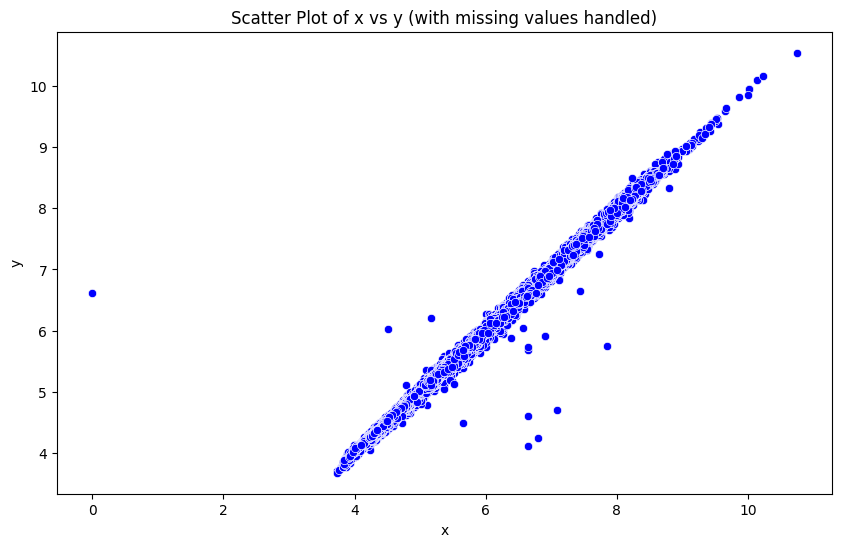

In [14]:
# Load the diamonds dataset and apply the previous modification
diamonds = sns.load_dataset('diamonds')
diamonds2 = diamonds.copy()
diamonds2['y'] = np.where((diamonds2['y'] < 3) | (diamonds2['y'] > 20), np.nan, diamonds2['y'])

# Create a scatter plot of 'x' vs 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds2, x='x', y='y', color='blue')

# Show the plot
plt.title('Scatter Plot of x vs y (with missing values handled)')
plt.show()

Other times you want to understand what makes observations with missing values different to observations with recorded values. 

For example, in nycflights13::flights1, missing values in the dep_time variable indicate that the flight was cancelled.

So you might want to compare the scheduled departure times for cancelled and non-cancelled times. 

You can do this by making a new variable, using is.na() to check if dep_time is missing.

In [15]:
#pip install nycflights13


Note: you may need to restart the kernel to use updated packages.


In [16]:
from nycflights13 import flights

In [17]:
# Prepare the dataset by mutating the columns
flights['cancelled'] = flights['dep_time'].isna()
flights['sched_hour'] = flights['sched_dep_time'] // 100
flights['sched_min'] = flights['sched_dep_time'] % 100
flights['sched_dep_time'] = flights['sched_hour'] + (flights['sched_min'] / 60)

In [18]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,cancelled,sched_hour,sched_min
0,2013,1,1,517.0,5.250000,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,False,5,15
1,2013,1,1,533.0,5.483333,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,False,5,29
2,2013,1,1,542.0,5.666667,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,False,5,40
3,2013,1,1,544.0,5.750000,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,False,5,45
4,2013,1,1,554.0,6.000000,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,False,6,0


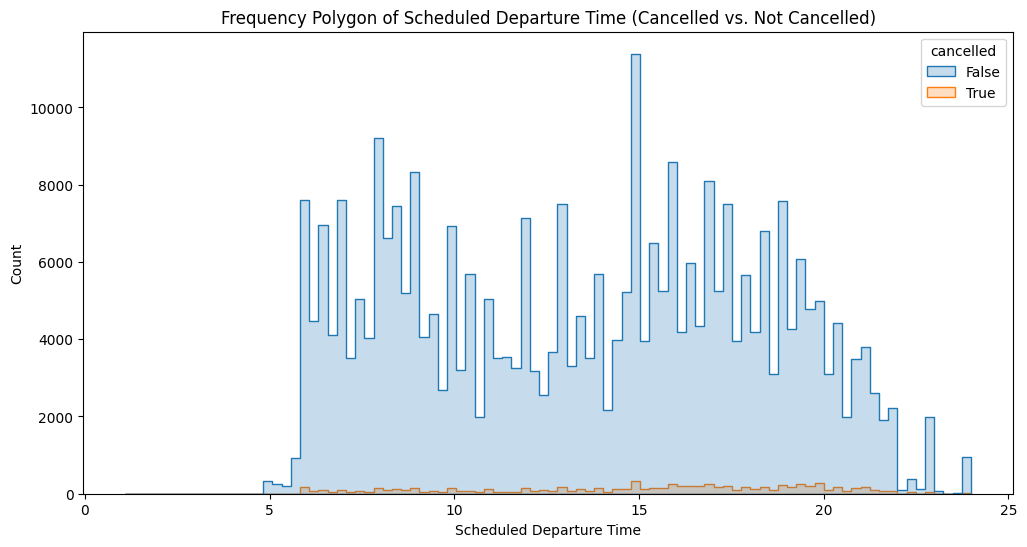

In [19]:
# Create a frequency polygon plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=flights,
    x='sched_dep_time',
    hue='cancelled',
    binwidth=0.25,
    element='step'
)

# Add labels and title
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Count')
plt.title('Frequency Polygon of Scheduled Departure Time (Cancelled vs. Not Cancelled)')
plt.show()


However this plot isn’t great because there are many more non-cancelled flights than cancelled flights. In the next section we’ll explore some techniques for improving this comparison.

10.5 Covariation

10.5.1 A categorical and a numerical variable

For example, let’s explore how the price of a diamond varies with its quality (measured by cut)

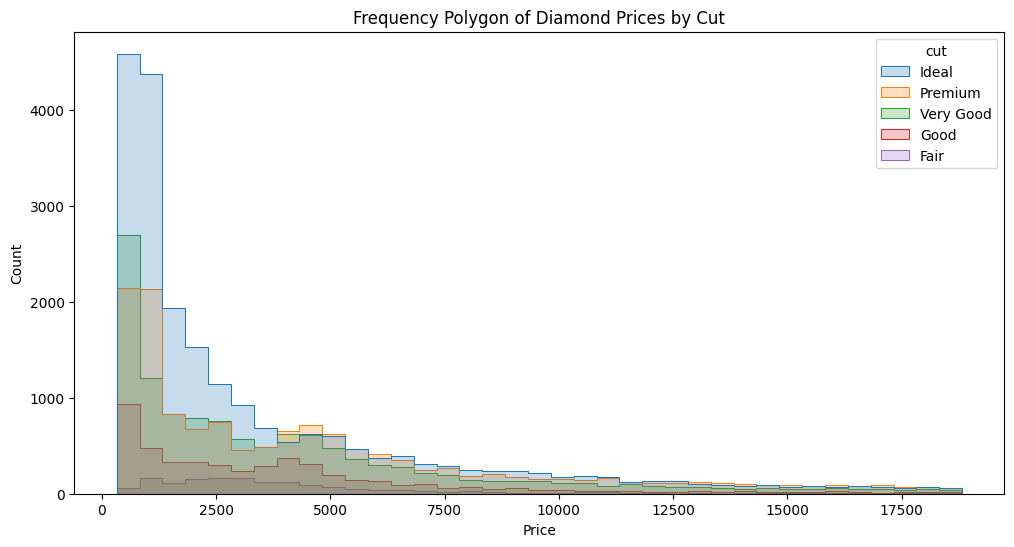

In [20]:
# Create a frequency polygon plot of price, colored by cut, with specified binwidth and linewidth
plt.figure(figsize=(12, 6))
sns.histplot(
    data=diamonds,
    x='price',
    hue='cut',
    binwidth=500,
    element='step',
    linewidth=0.75
)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Frequency Polygon of Diamond Prices by Cut')
plt.show()


To make the comparison easier we need to swap what is displayed on the y-axis. Instead of displaying count, we’ll display the density, which is the count standardized so that the area under each frequency polygon is one.


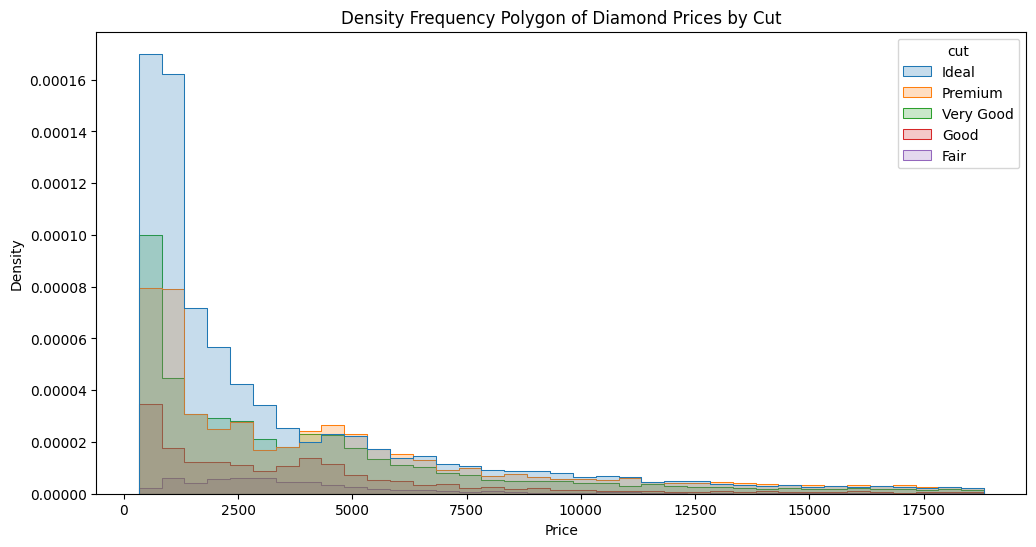

In [21]:
# Create a frequency polygon plot of price (scaled to density), colored by cut, with specified binwidth and linewidth
plt.figure(figsize=(12, 6))
sns.histplot(
    data=diamonds,
    x='price',
    hue='cut',
    binwidth=500,
    element='step',
    stat='density',  # Equivalent to after_stat(density) in ggplot2
    linewidth=0.75
)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Frequency Polygon of Diamond Prices by Cut')
plt.show()


A visually simpler plot for exploring this relationship is using side-by-side boxplots.

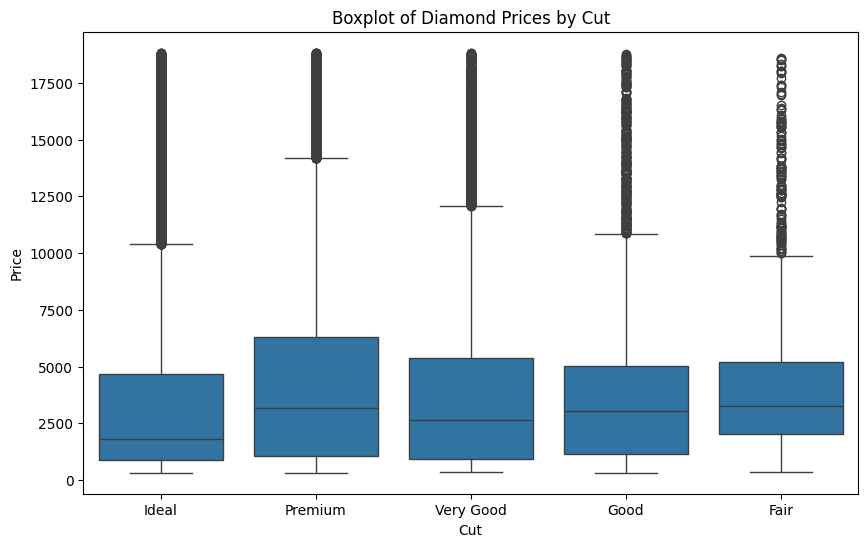

In [22]:
# Create a boxplot of price by cut
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamonds, x='cut', y='price')

# Add labels and title
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Boxplot of Diamond Prices by Cut')
plt.show()


It supports the counter-intuitive finding that better quality diamonds are typically cheaper! In the exercises, you’ll be challenged to figure out why.

10.5.2 Two categorical variables

To visualize the covariation between categorical variables, you’ll need to count the number of observations for each combination of levels of these categorical variables.

C:\Users\acuad\AppData\Local\Temp\ipykernel_13108\3562771787.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=diamonds.groupby(['color','cut']).size().unstack(),


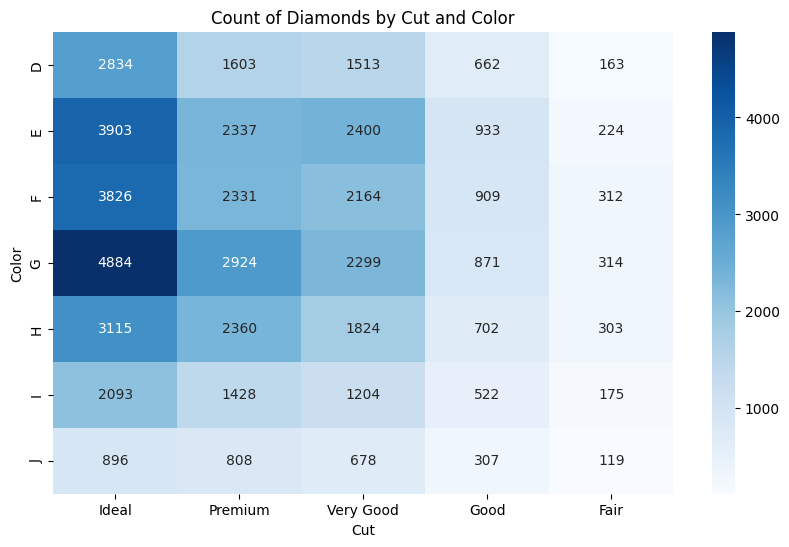

In [23]:
# Create a count plot of cut vs color
plt.figure(figsize=(10, 6))
sns.heatmap(
    data=diamonds.groupby(['color','cut']).size().unstack(),
    cmap='Blues',
    annot=True,
    fmt='d'
)

# Add labels and title
plt.xlabel('Cut')
plt.ylabel('Color')
plt.title('Count of Diamonds by Cut and Color')
plt.show()


In [24]:
# Count the number of occurrences of each combination of color and cut
color_cut_counts = diamonds.groupby(['color', 'cut']).size().reset_index(name='n')

# Display the result
print(color_cut_counts)

   color        cut     n
0      D      Ideal  2834
1      D    Premium  1603
2      D  Very Good  1513
3      D       Good   662
4      D       Fair   163
5      E      Ideal  3903
6      E    Premium  2337
7      E  Very Good  2400
8      E       Good   933
9      E       Fair   224
10     F      Ideal  3826
11     F    Premium  2331
12     F  Very Good  2164
13     F       Good   909
14     F       Fair   312
15     G      Ideal  4884
16     G    Premium  2924
17     G  Very Good  2299
18     G       Good   871
19     G       Fair   314
20     H      Ideal  3115
21     H    Premium  2360
22     H  Very Good  1824
23     H       Good   702
24     H       Fair   303
25     I      Ideal  2093
26     I    Premium  1428
27     I  Very Good  1204
28     I       Good   522
29     I       Fair   175
30     J      Ideal   896
31     J    Premium   808
32     J  Very Good   678
33     J       Good   307
34     J       Fair   119


C:\Users\acuad\AppData\Local\Temp\ipykernel_13108\2181292529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  color_cut_counts = diamonds.groupby(['color', 'cut']).size().reset_index(name='n')


10.5.3 Two numerical variables

you can see a positive relationship between the carat size and price of a diamond: diamonds with more carats have a higher price. The relationship is exponential.

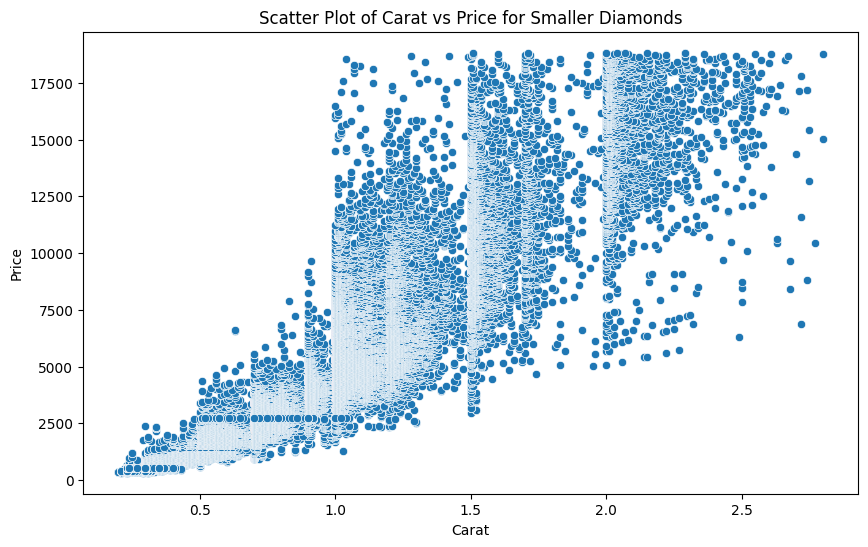

In [25]:
# Filter the dataset to include only diamonds with carat less than 3
smaller = diamonds[diamonds['carat'] < 3]

# Create a scatter plot of carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=smaller, x='carat', y='price')

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs Price for Smaller Diamonds')
plt.show()


Scatterplots become less useful as the size of your dataset grows, because points begin to overplot, and pile up into areas of uniform black, making it hard to judge differences in the density of the data across the 2-dimensional space as well as making it hard to spot the trend. 

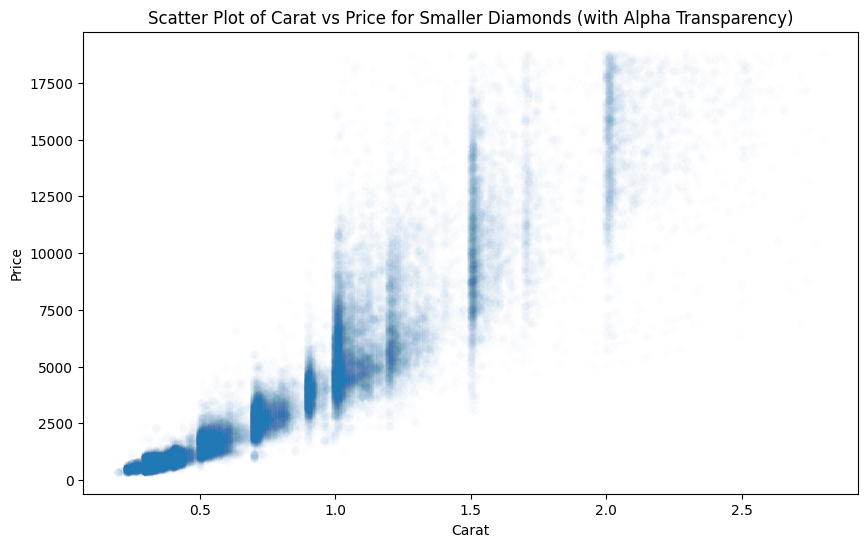

In [26]:
# Filter the dataset to include only diamonds with carat less than 3
smaller = diamonds[diamonds['carat'] < 3]

# Create a scatter plot of carat vs price with alpha transparency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=smaller, x='carat', y='price', alpha=0.01)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs Price for Smaller Diamonds (with Alpha Transparency)')
plt.show()


You’ve already seen one way to fix the problem: using the alpha aesthetic to add transparency.

But using transparency can be challenging for very large datasets. Another solution is to use bin. 

1.  2D Bin Plot Equivalent to geom_bin2d()

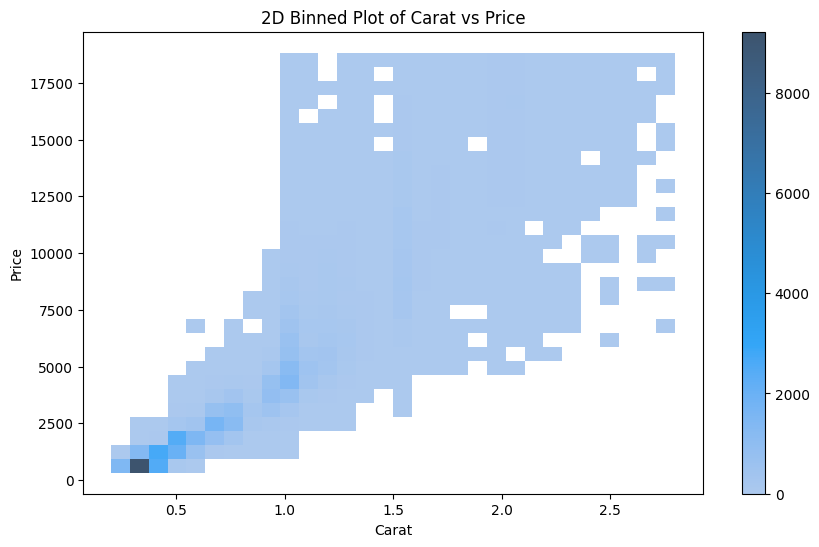

In [27]:
# Filter the dataset to include only diamonds with carat less than 3
smaller = diamonds[diamonds['carat'] < 3]

# Create a 2D binned plot (equivalent to geom_bin2d)
plt.figure(figsize=(10, 6))
sns.histplot(data=smaller, x='carat', y='price', bins=30, cbar=True)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('2D Binned Plot of Carat vs Price')
plt.show()


2. Hexbin Plot Equivalent to geom_hex()

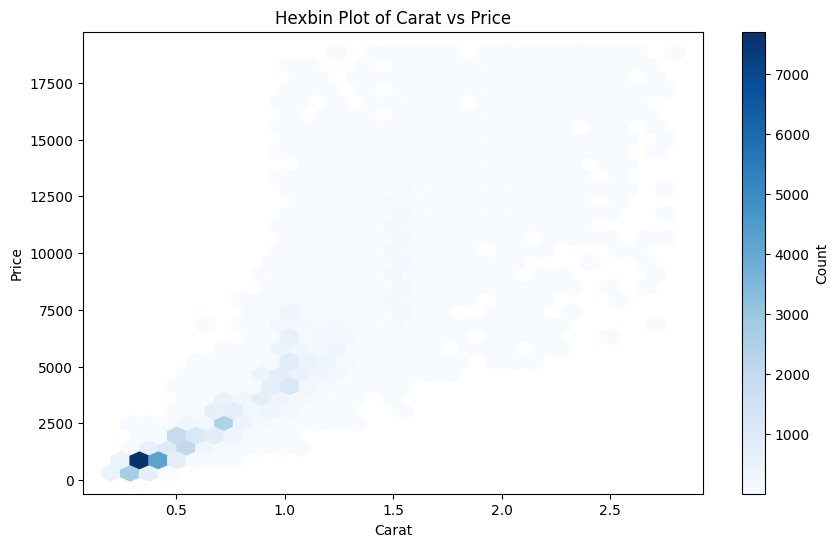

In [28]:
# Create a hexbin plot (equivalent to geom_hex)
plt.figure(figsize=(10, 6))
plt.hexbin(smaller['carat'], smaller['price'], gridsize=30, cmap='Blues', mincnt=1)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Hexbin Plot of Carat vs Price')
plt.colorbar(label='Count')
plt.show()


geom_bin2d() and geom_hex() divide the coordinate plane into 2d bins and then use a fill color to display how many points fall into each bin. 

geom_bin2d() creates rectangular bins. 

geom_hex() creates hexagonal bins.

Another option is to bin one continuous variable so it acts like a categorical variable. 

Then you can use one of the techniques for visualizing the combination of a categorical and a continuous variable that you learned about. 

For example, you could bin carat and then for each group, display a boxplot:

C:\Users\acuad\AppData\Local\Temp\ipykernel_13108\408419372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller['carat_group'] = pd.cut(smaller['carat'], bins=pd.interval_range(start=0, end=3, freq=0.1))


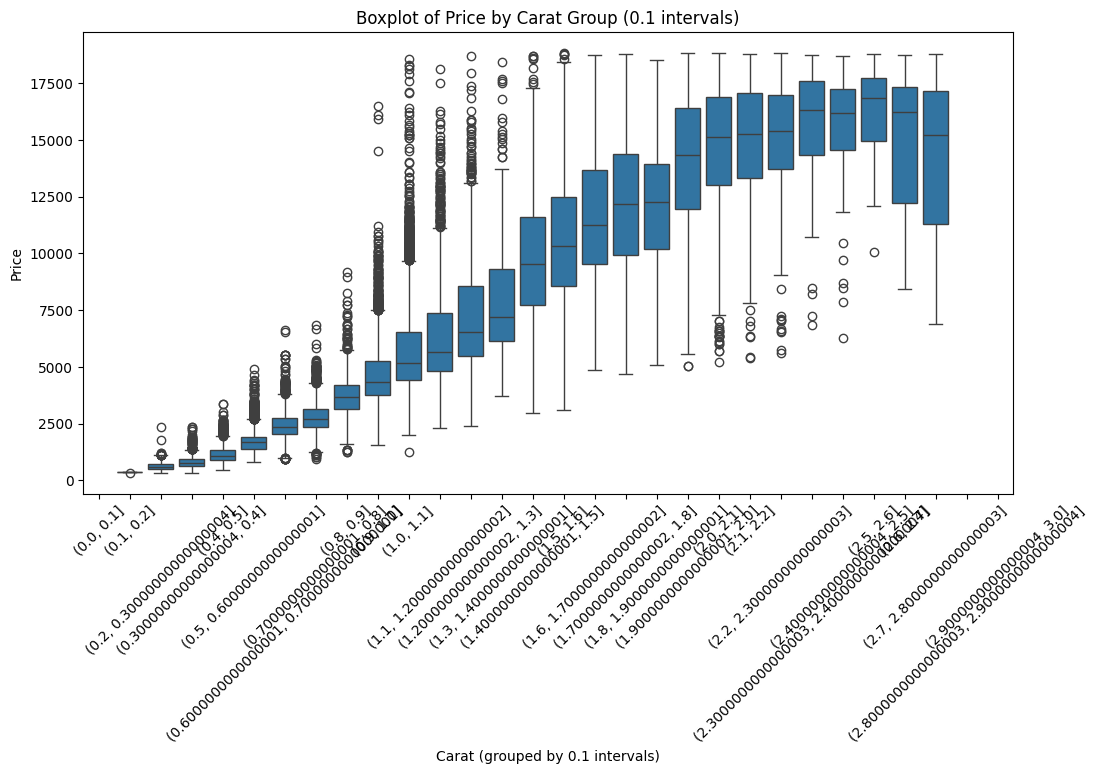

In [29]:
# Filter the dataset to include only diamonds with carat less than 3
smaller = diamonds[diamonds['carat'] < 3]

# Create a new column that groups carat values into intervals of 0.1
smaller['carat_group'] = pd.cut(smaller['carat'], bins=pd.interval_range(start=0, end=3, freq=0.1))

# Create a boxplot of price by carat group
plt.figure(figsize=(12, 6))
sns.boxplot(data=smaller, x='carat_group', y='price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Carat (grouped by 0.1 intervals)')
plt.ylabel('Price')
plt.title('Boxplot of Price by Carat Group (0.1 intervals)')
plt.show()


10.6 Patterns and models

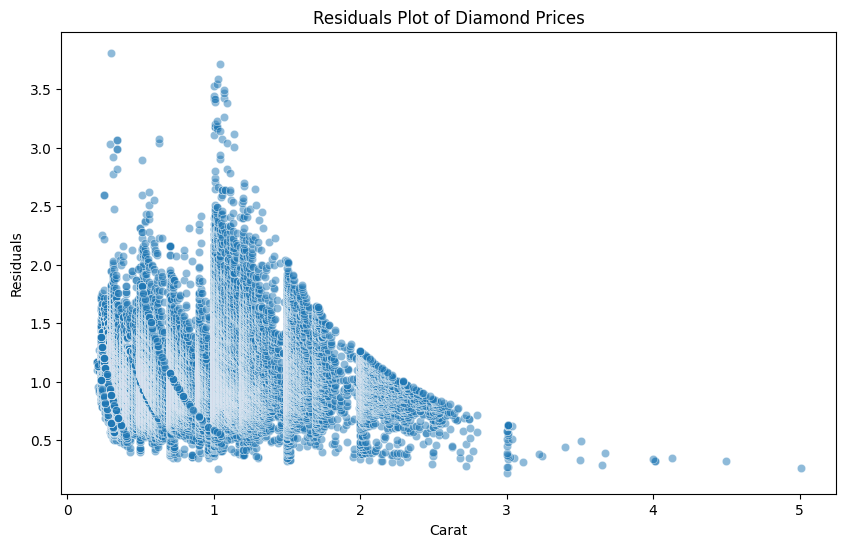

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create log-transformed variables
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['log_carat'] = np.log(diamonds['carat'])

# Step 2: Fit a linear regression model
X = diamonds[['log_carat']]
y = diamonds['log_price']

model = LinearRegression()
model.fit(X, y)

# Step 3: Create predictions and calculate residuals
diamonds['log_price_pred'] = model.predict(X)
diamonds['residuals'] = np.exp(diamonds['log_price'] - diamonds['log_price_pred'])

# Step 4: Plot the residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='carat', y='residuals', alpha=0.5)

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Residuals')
plt.title('Residuals Plot of Diamond Prices')
plt.show()


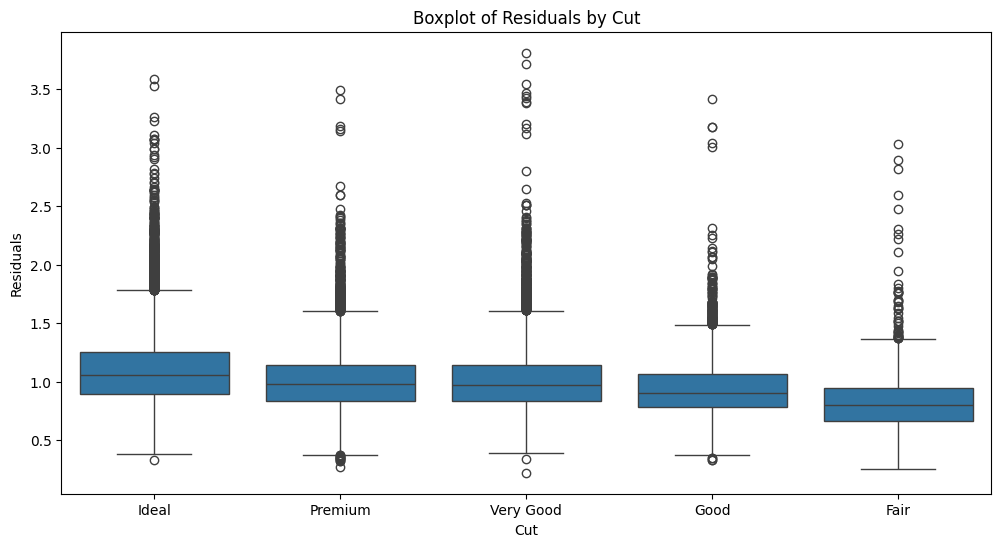

In [36]:
# Step 1: Create log-transformed variables
diamonds['log_price'] = np.log(diamonds['price'])
diamonds['log_carat'] = np.log(diamonds['carat'])

# Step 2: Fit a linear regression model
X = diamonds[['log_carat']]
y = diamonds['log_price']

model = LinearRegression()
model.fit(X, y)

# Step 3: Create predictions and calculate residuals
diamonds['log_price_pred'] = model.predict(X)
diamonds['residuals'] = np.exp(diamonds['log_price'] - diamonds['log_price_pred'])

# Step 4: Create a boxplot of residuals by cut
plt.figure(figsize=(12, 6))
sns.boxplot(data=diamonds, x='cut', y='residuals')

# Add labels and title
plt.xlabel('Cut')
plt.ylabel('Residuals')
plt.title('Boxplot of Residuals by Cut')
plt.show()


Once you’ve removed the strong relationship between carat and price, you can see what you expect in the relationship between cut and price: relative to their size, better quality diamonds are more expensive.